<a href="https://colab.research.google.com/github/eko-andri-prasetyo/proyek-machine-learning/blob/main/%5BClustering%5D_Submission_Akhir_BMLP_Eko_Andri_Prasetyo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**

Dataset ini menyajikan gambaran mendalam mengenai perilaku transaksi dan pola aktivitas keuangan, sehingga sangat ideal untuk eksplorasi **deteksi penipuan (fraud detection)** dan **identifikasi anomali**. Dataset ini mencakup **2.512 sampel data transaksi**, yang mencakup berbagai atribut transaksi, demografi nasabah, dan pola penggunaan.

Setiap entri memberikan wawasan komprehensif terhadap perilaku transaksi, memungkinkan analisis untuk **keamanan finansial** dan pengembangan model prediktif.

## Fitur Utama

- **`TransactionID`**: Pengidentifikasi unik alfanumerik untuk setiap transaksi.  
- **`AccountID`**: ID unik untuk setiap akun, dapat memiliki banyak transaksi.  
- **`TransactionAmount`**: Nilai transaksi dalam mata uang, mulai dari pengeluaran kecil hingga pembelian besar.  
- **`TransactionDate`**: Tanggal dan waktu transaksi terjadi.  
- **`TransactionType`**: Tipe transaksi berupa `'Credit'` atau `'Debit'`.  
- **`Location`**: Lokasi geografis transaksi (nama kota di Amerika Serikat).  
- **`DeviceID`**: ID perangkat yang digunakan dalam transaksi.  
- **`IP Address`**: Alamat IPv4 yang digunakan saat transaksi, dapat berubah untuk beberapa akun.  
- **`MerchantID`**: ID unik merchant, menunjukkan merchant utama dan anomali transaksi.  
- **`AccountBalance`**: Saldo akun setelah transaksi berlangsung.  
- **`PreviousTransactionDate`**: Tanggal transaksi terakhir pada akun, berguna untuk menghitung frekuensi transaksi.  
- **`Channel`**: Kanal transaksi seperti `Online`, `ATM`, atau `Branch`.  
- **`CustomerAge`**: Usia pemilik akun.  
- **`CustomerOccupation`**: Profesi pengguna seperti `Dokter`, `Insinyur`, `Mahasiswa`, atau `Pensiunan`.  
- **`TransactionDuration`**: Lama waktu transaksi (dalam detik).  
- **`LoginAttempts`**: Jumlah upaya login sebelum transaksi—jumlah tinggi bisa mengindikasikan anomali.

Tugas kamu adalah membuat model clustering yang selanjutnya akan digunakan untuk membuat model klasifikasi.


# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [ ]:
# **1. Import Library**
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
import joblib

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://docs.google.com/spreadsheets/d/e/2PACX-1vTbg5WVW6W3c8SPNUGc3A3AL-AG32TPEQGpdzARfNICMsLFI0LQj0jporhsLCeVhkN5AoRsTkn08AYl/pub?gid=2020477971&single=true&output=csv'
df = pd.read_csv(url)
```

Penting: pada kriteria pertama hindari penggunaan print() dan display() karena seluruh fungsi yang digunakan sudah memiliki standar output dan menghasilkan output yang diharapkan.

Kriteria 1 akan ditolak ketika:
- print(__.head())
- display(___.head())
dst

Kriteria 1 akan diterima ketika Anda menggunakan fungsi yang diminta tanpa menambahkan deskripsi apapun.

In [ ]:
# **2. Memuat Dataset**
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTbg5WVW6W3c8SPNUGc3A3AL-AG32TPEQGpdzARfNICMsLFI0LQj0jporhsLCeVhkN5AoRsTkn08AYl/pub?gid=2020477971&single=true&output=csv'
df = pd.read_csv(url)

In [ ]:
# Tampilkan 5 baris pertama dengan function head.
df.head()

,TransactionID,AccountID,TransactionAmount,PreviousTransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 8:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 8:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 8:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 8:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 8:06:39


In [ ]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   PreviousTransactionDate  2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [ ]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

**Apabila ingin menerapkan Advanced, pastikan seluruh visualisasi tidak ada yang overlap**

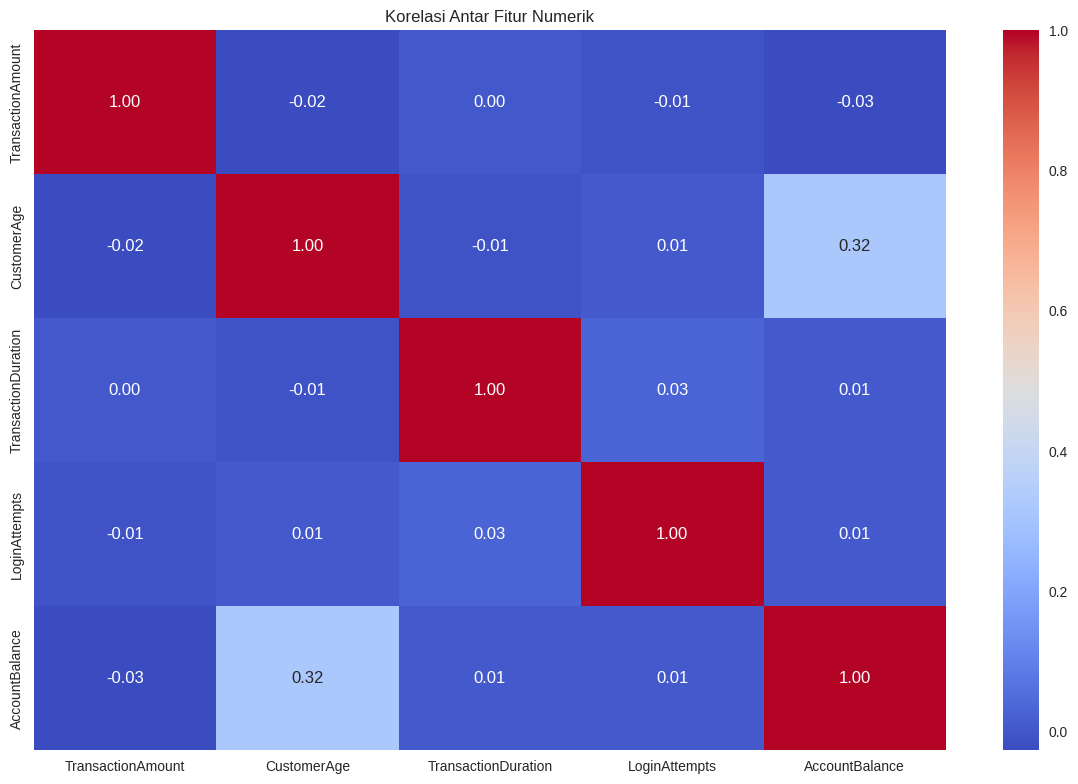

In [ ]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi Antar Fitur Numerik')
plt.tight_layout()
plt.show()

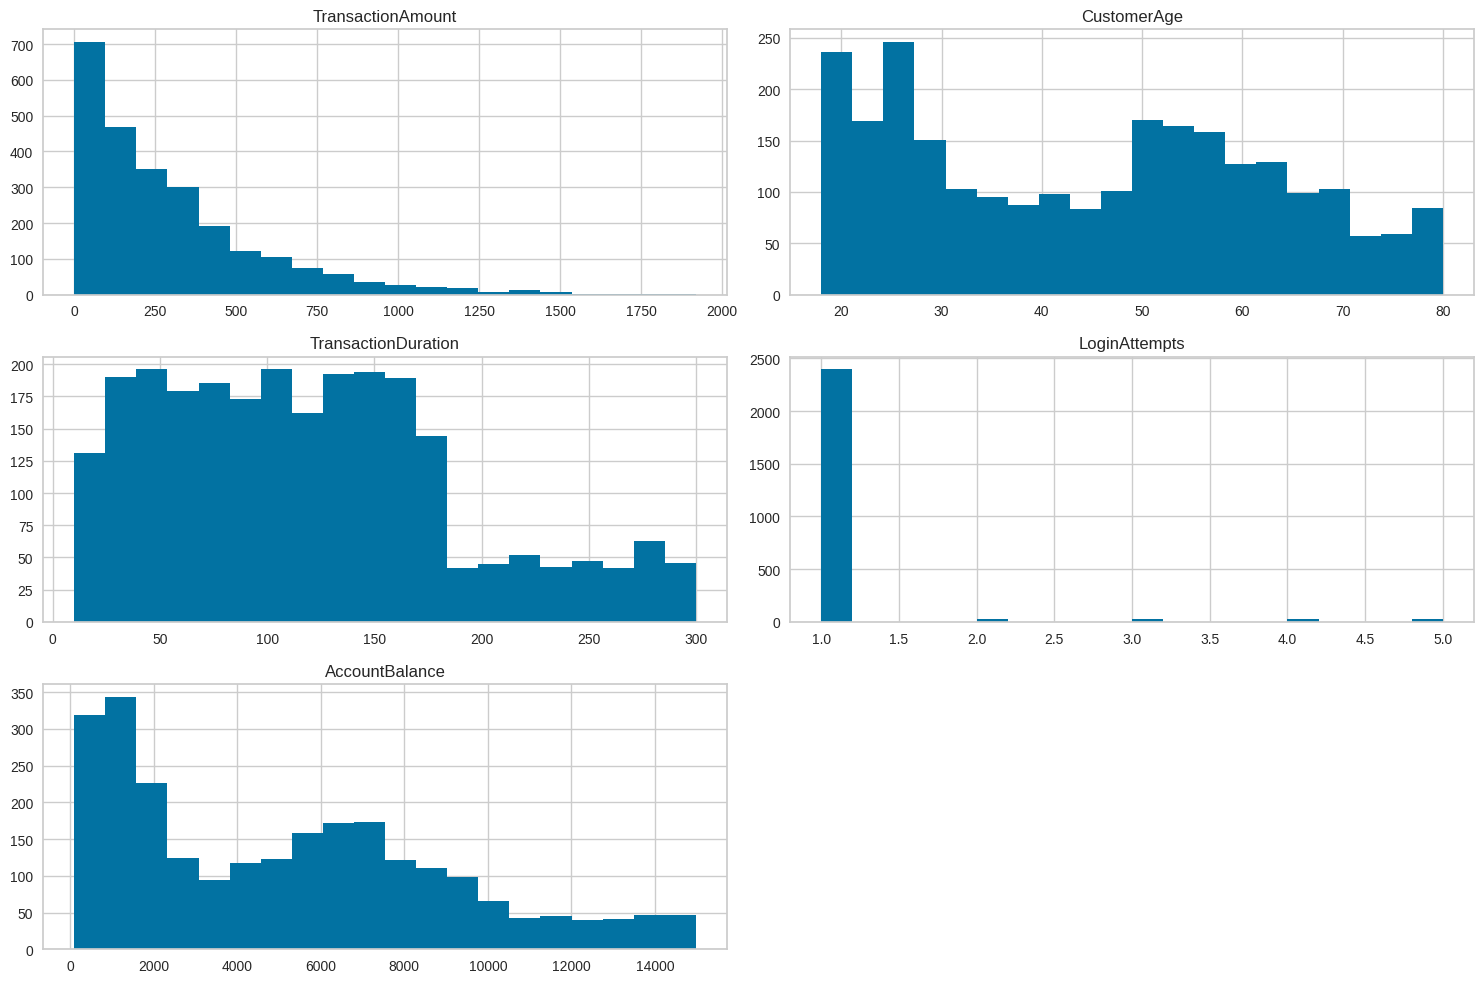

In [ ]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
numeric_df.hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

<Figure size 1500x1200 with 0 Axes>

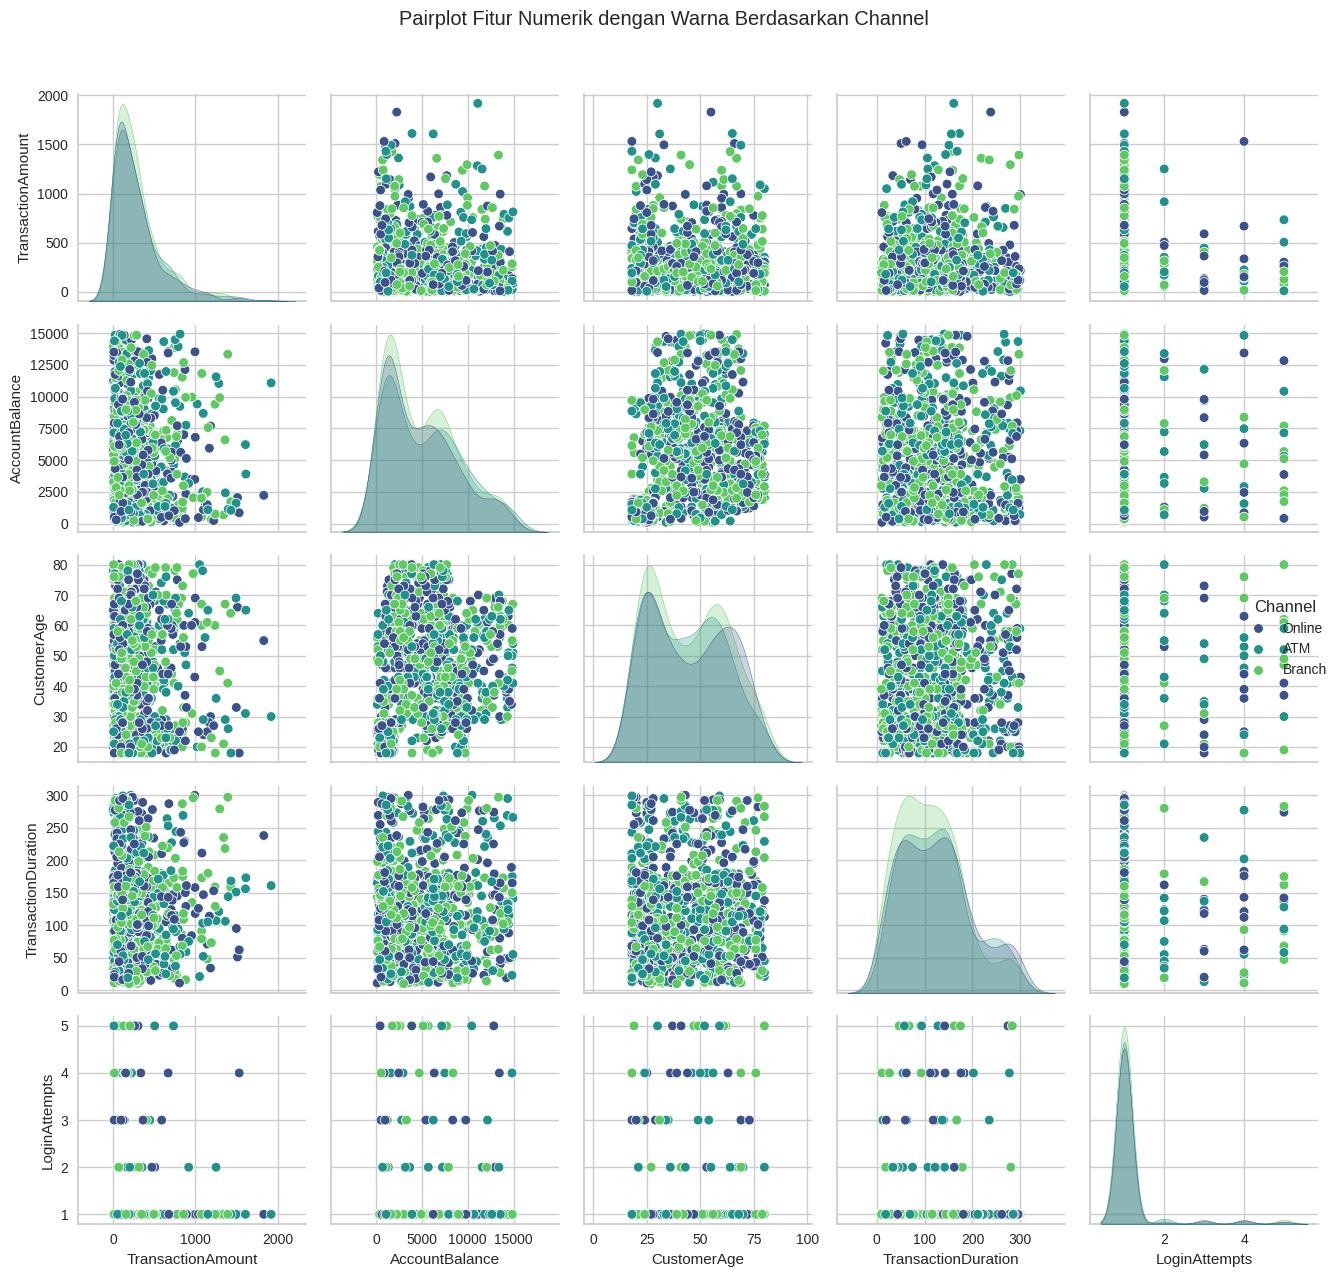

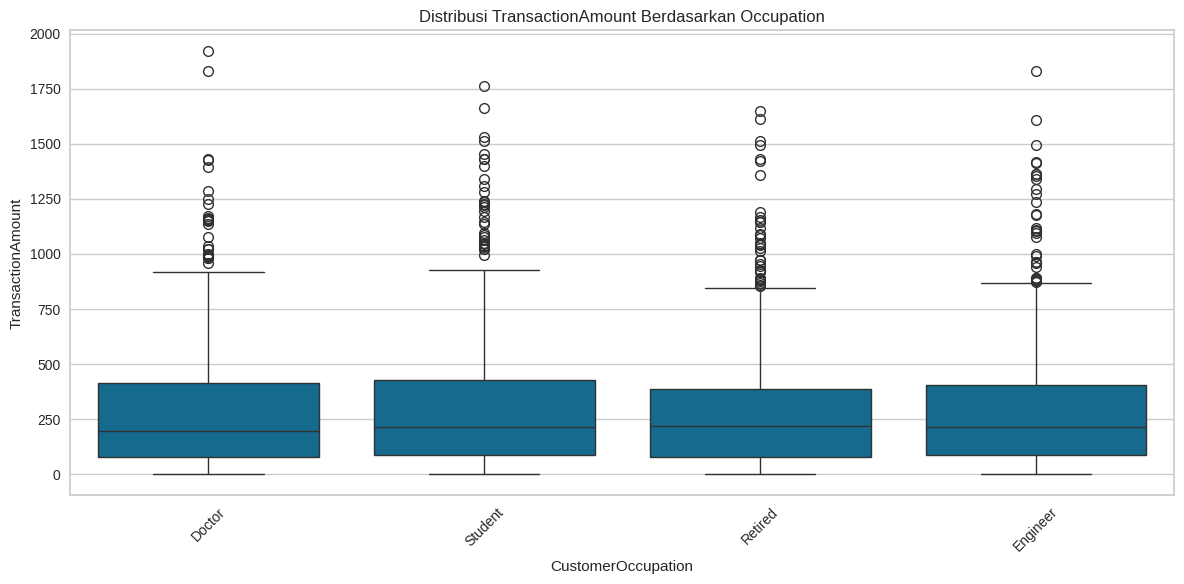

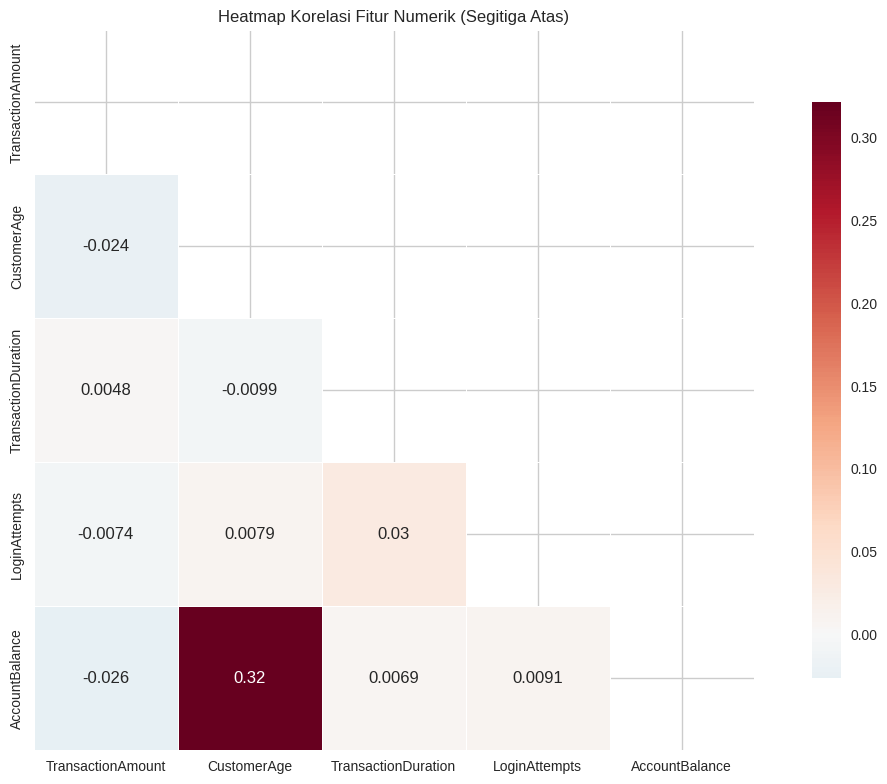

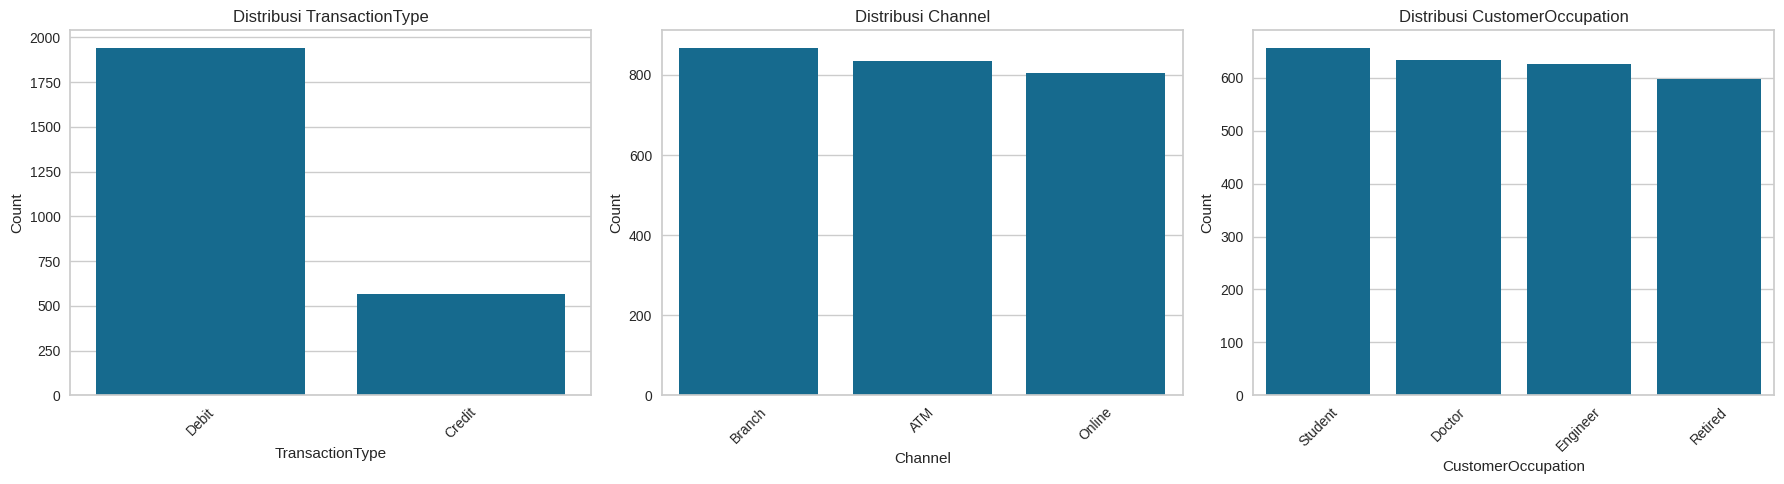

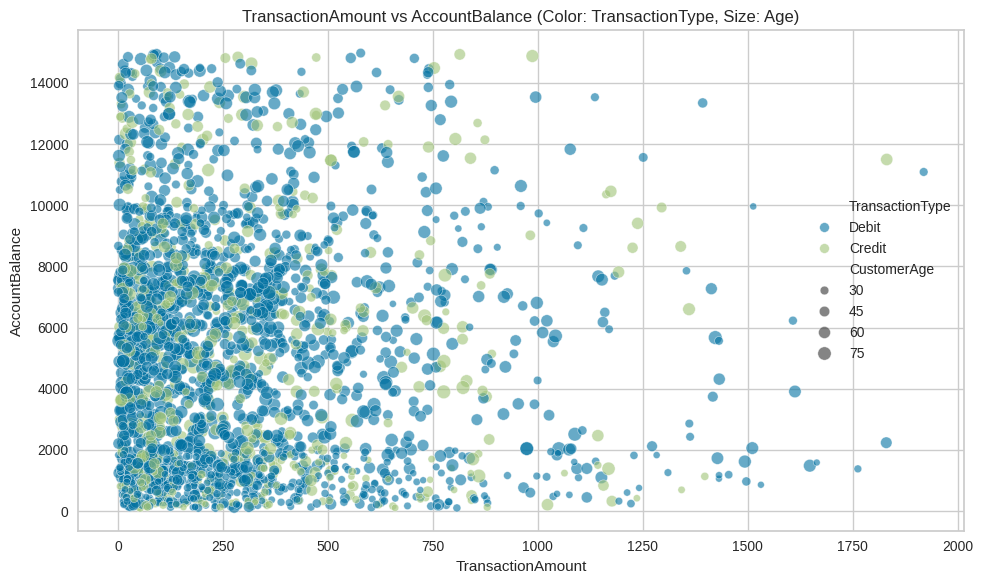

In [ ]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)
# Pairplot untuk melihat hubungan antar fitur numerik dengan warna berdasarkan fitur kategorikal
import seaborn as sns
import matplotlib.pyplot as plt

# Pilih subset fitur numerik untuk visualisasi
numeric_features = ['TransactionAmount', 'AccountBalance', 'CustomerAge', 'TransactionDuration', 'LoginAttempts']

# Buat pairplot dengan hue berdasarkan Channel (contoh fitur kategorikal)
plt.figure(figsize=(15, 12))
sns.pairplot(df[numeric_features + ['Channel']].sample(1000), hue='Channel', palette='viridis', diag_kind='kde')
plt.suptitle('Pairplot Fitur Numerik dengan Warna Berdasarkan Channel', y=1.02)
plt.tight_layout()
plt.show()

# Boxplot untuk melihat distribusi TransactionAmount berdasarkan Occupation
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='CustomerOccupation', y='TransactionAmount')
plt.title('Distribusi TransactionAmount Berdasarkan Occupation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Heatmap korelasi dengan annotasi yang lebih jelas
plt.figure(figsize=(12, 8))
corr_matrix = df.select_dtypes(include=[np.number]).corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0,
           square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Heatmap Korelasi Fitur Numerik (Segitiga Atas)')
plt.tight_layout()
plt.show()

# Countplot untuk fitur kategorikal dengan rotasi label
categorical_features = ['TransactionType', 'Channel', 'CustomerOccupation']
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, feature in enumerate(categorical_features):
    value_counts = df[feature].value_counts()
    sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[i])
    axes[i].set_title(f'Distribusi {feature}')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

# Scatter plot dengan fitur numerik penting
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='TransactionAmount', y='AccountBalance',
               hue='TransactionType', size='CustomerAge', alpha=0.6)
plt.title('TransactionAmount vs AccountBalance (Color: TransactionType, Size: Age)')
plt.tight_layout()
plt.show()

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [ ]:
# Mengecek dataset menggunakan isnull().sum()
df.isnull().sum()

,0
TransactionID,29
AccountID,21
TransactionAmount,26
PreviousTransactionDate,28
TransactionType,30
Location,30
DeviceID,30
IP Address,20
MerchantID,23
Channel,27


In [ ]:
# Mengecek dataset menggunakan duplicated().sum()
df.duplicated().sum()

np.int64(21)

In [ ]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.
scaler = StandardScaler()
numeric_cols = df.select_dtypes(include=[np.number]).columns
df_scaled = df.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])
df_scaled.head()

,TransactionID,AccountID,TransactionAmount,PreviousTransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,TX000001,AC00128,-0.970546,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,1.419862,Doctor,-0.548393,-0.204629,-0.000315,2024-11-04 8:08:08
1,TX000002,AC00455,0.268963,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,1.307715,Doctor,0.307960,-0.204629,2.218381,2024-11-04 8:09:35
2,TX000003,AC00019,-0.586526,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,-1.439874,Student,-0.905207,-0.204629,-1.024091,2024-11-04 8:07:04
3,TX000004,AC00070,-0.387294,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,-1.047361,Student,-1.347656,-0.204629,0.886694,2024-11-04 8:09:06
4,TX000005,AC00411,-0.972736,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,1.121495,-0.204629,0.594263,2024-11-04 8:06:39


In [ ]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
id_cols = ['TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'MerchantID']
df_scaled = df_scaled.drop(columns=id_cols)

In [ ]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.
categorical_cols = df_scaled.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_scaled[col] = le.fit_transform(df_scaled[col].astype(str))
    label_encoders[col] = le

df_scaled.head()

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,-0.970546,680,1,36,0,1.419862,0,-0.548393,-0.204629,-0.000315,105
1,0.268963,1178,1,15,0,1.307715,0,0.307960,-0.204629,2.218381,192
2,-0.586526,1262,1,23,2,-1.439874,3,-0.905207,-0.204629,-1.024091,41
3,-0.387294,818,1,33,2,-1.047361,3,-1.347656,-0.204629,0.886694,163
4,-0.972736,1939,0,1,2,NaN,3,1.121495,-0.204629,0.594263,16


In [ ]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
# ____.columns.tolist()
df_scaled.columns.tolist()

['TransactionAmount',
 'PreviousTransactionDate',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'TransactionDate']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
df_scaled = df_scaled.dropna()

In [ ]:
# Menghapus data duplikat menggunakan drop_duplicates().
df_scaled = df_scaled.drop_duplicates()

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.
from scipy import stats
import numpy as np

# Identifikasi outlier menggunakan Z-score untuk fitur numerik
numeric_cols = df.select_dtypes(include=[np.number]).columns
outlier_info = {}

print("Deteksi Outlier menggunakan Z-score (threshold > 3):")
for col in numeric_cols:
    # Hitung z-score tanpa dropna, ganti NaN dengan 0 untuk perhitungan
    col_data = df[col].fillna(0)
    z_scores = np.abs(stats.zscore(col_data))
    outlier_count = np.sum(z_scores > 3)
    outlier_percentage = (outlier_count / len(df[col])) * 100
    outlier_info[col] = {'count': outlier_count, 'percentage': outlier_percentage}

    print(f"{col}: {outlier_count} outlier ({outlier_percentage:.2f}%)")

# Handle outlier berdasarkan persentase
for col in numeric_cols:
    if outlier_info[col]['percentage'] < 5:  # Jika outlier < 5%, drop
        col_data = df[col].fillna(0)
        z_scores = np.abs(stats.zscore(col_data))
        outlier_mask = z_scores > 3
        # Pastikan mask memiliki panjang yang sama dengan dataframe
        if len(outlier_mask) == len(df):
            df = df[~outlier_mask]
            print(f"Dropped {outlier_info[col]['count']} outliers from {col}")
        else:
            print(f"Warning: Mask length mismatch for {col}, skipping drop")
    else:  # Jika outlier > 5%, cap dengan IQR method
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap the outliers
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
        print(f"Capped outliers in {col} using IQR method")

print(f"Shape setelah handling outlier: {df.shape}")

Deteksi Outlier menggunakan Z-score (threshold > 3):
TransactionAmount: 48 outlier (1.89%)
CustomerAge: 0 outlier (0.00%)
TransactionDuration: 0 outlier (0.00%)
LoginAttempts: 93 outlier (3.67%)
AccountBalance: 0 outlier (0.00%)
Dropped 48 outliers from TransactionAmount
Dropped 0 outliers from CustomerAge
Dropped 0 outliers from TransactionDuration
Dropped 93 outliers from LoginAttempts
Dropped 0 outliers from AccountBalance
Shape setelah handling outlier: (2399, 16)


In [ ]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.
# Pastikan kamu mengerjakan tahapan ini pada satu cell.
# Binning untuk TransactionAmount
transaction_bins = [0, 100, 500, 2000, 10000, float('inf')]
transaction_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
df['TransactionAmount_Binned'] = pd.cut(df['TransactionAmount'], bins=transaction_bins, labels=transaction_labels, include_lowest=True)

# Binning untuk CustomerAge
age_bins = [0, 25, 35, 45, 55, 65, float('inf')]
age_labels = ['Young', 'Young Adult', 'Middle Age', 'Senior', 'Elderly', 'Very Elderly']
df['CustomerAge_Binned'] = pd.cut(df['CustomerAge'], bins=age_bins, labels=age_labels, include_lowest=True)

# Encode hasil binning menggunakan LabelEncoder
le = LabelEncoder()
df['TransactionAmount_Encoded'] = le.fit_transform(df['TransactionAmount_Binned'].astype(str))
df['CustomerAge_Encoded'] = le.fit_transform(df['CustomerAge_Binned'].astype(str))

# Drop kolom binning asli yang tidak terencode
df = df.drop(['TransactionAmount_Binned', 'CustomerAge_Binned'], axis=1)

print("Binning dan encoding selesai. 5 baris pertama:")
df[['TransactionAmount', 'TransactionAmount_Encoded', 'CustomerAge', 'CustomerAge_Encoded']].head()

Binning dan encoding selesai. 5 baris pertama:


,TransactionAmount,TransactionAmount_Encoded,CustomerAge,CustomerAge_Encoded
0,14.09,2,70.0,3
1,376.24,0,68.0,3
2,126.29,0,19.0,4
3,184.50,0,26.0,5
4,13.45,2,NaN,6


# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [ ]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
# ___.describe()
df_scaled.describe()

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
count,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000
mean,-0.000425,1256.404921,0.788574,21.383653,1.013344,-0.003388,1.532110,0.000832,-0.002560,-0.006050,180.984987
std,0.997561,726.716182,0.437979,12.417622,0.831075,1.000136,1.153802,1.003159,0.989711,1.001030,103.757245
min,-1.017881,0.000000,0.000000,0.000000,0.000000,-1.495947,0.000000,-1.561745,-0.204629,-1.286100,0.000000
25%,-0.737943,626.250000,1.000000,11.000000,0.000000,-0.991288,0.000000,-0.805299,-0.204629,-0.929992,92.000000
50%,-0.290005,1254.500000,1.000000,21.000000,1.000000,0.018031,2.000000,-0.105944,-0.204629,-0.110335,181.000000
75%,0.389115,1884.750000,1.000000,32.000000,2.000000,0.803056,3.000000,0.607683,-0.204629,0.652406,271.750000
max,5.549651,2485.000000,2.000000,43.000000,3.000000,1.980594,4.000000,2.577295,6.525404,2.531190,360.000000


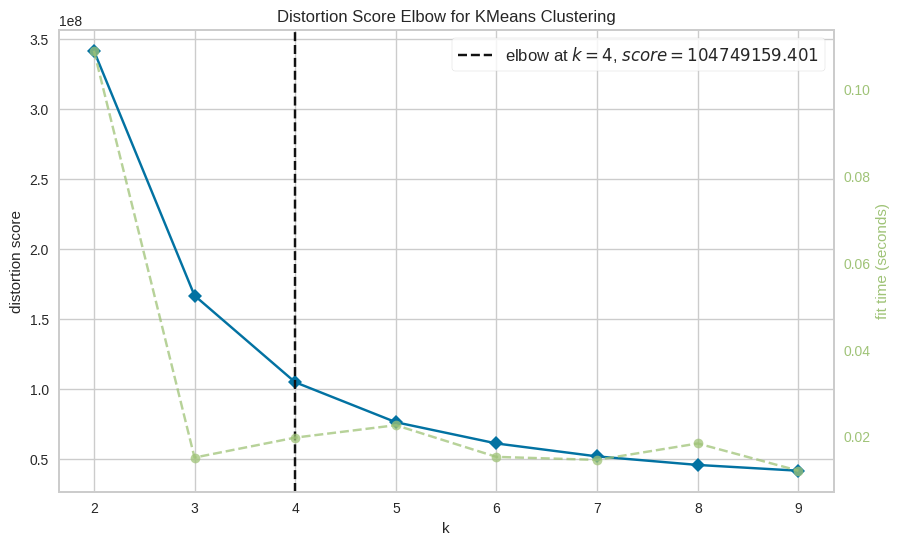

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
plt.figure(figsize=(10, 6))
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2, 10))
visualizer.fit(df_scaled)
visualizer.show()

In [ ]:
# Menggunakan algoritma K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df_scaled)
df_scaled['Cluster'] = clusters

Jalankan cell code ini untuk menyimpan model kamu.

In [ ]:
# Menyimpan model menggunakan joblib
# import joblib
# joblib.dump(___, "model_clustering.h5")
import joblib
joblib.dump(kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# Menghitung dan menampilkan nilai Silhouette Score.
silhouette_avg = silhouette_score(df_scaled.drop('Cluster', axis=1), clusters)
print(f"Silhouette Score: {silhouette_avg:.4f}")

Silhouette Score: 0.5403


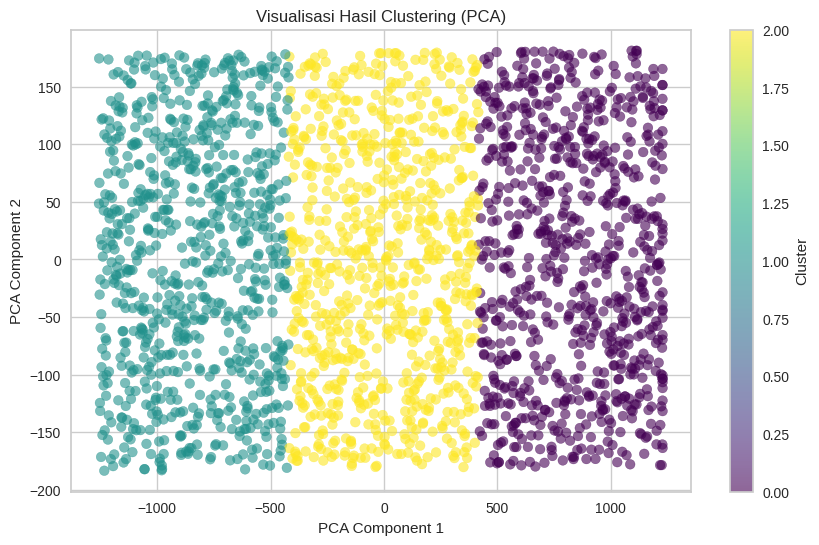

In [ ]:
# Membuat visualisasi hasil clustering
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled.drop('Cluster', axis=1))

plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.title('Visualisasi Hasil Clustering (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

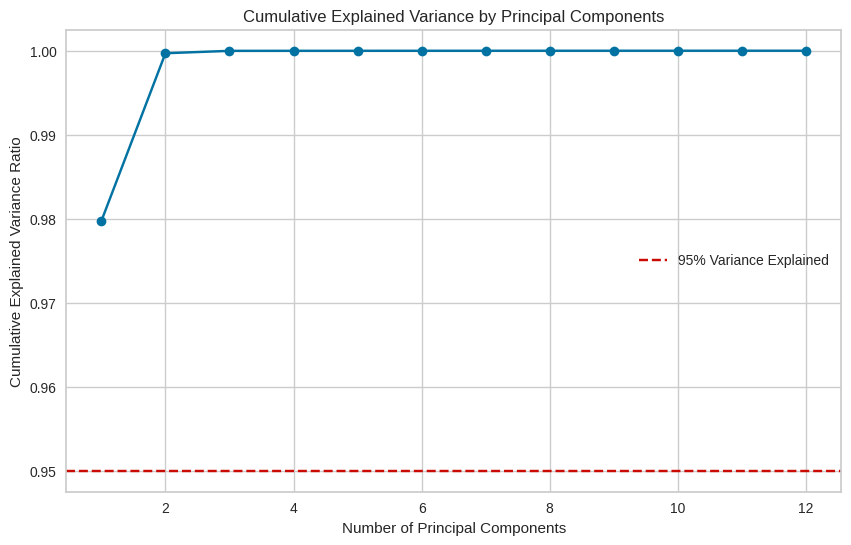

PCA dilakukan dengan 8 komponen utama
Variance explained: 1.0000
5 baris pertama data PCA:


,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,Cluster_PCA
0,-576.251174,-77.177740,14.421080,-1.733821,-0.593204,-0.923020,-0.037184,0.806864,1
1,-78.428198,10.886104,-6.327969,-2.867821,0.054715,0.454732,-0.380772,0.346889,2
2,5.870550,-139.979415,1.063945,2.182216,-0.818499,-0.734536,0.189516,-0.587953,2
3,-438.366251,-18.895022,11.632370,0.938769,-1.122602,-0.531657,0.535174,-0.917715,1
4,-621.071510,-169.234208,6.067061,2.215449,0.618998,-0.641787,-0.739781,-0.557212,1


In [ ]:
# Membangun model menggunakan PCA.
# ___ =PCA(n_components=<x>)
# ___ = ____.fit_transform(___)
# Menyimpan data PCA sebagai Dataframe dengan nama PCA_<numbers>
# <data_final> = pd.DataFrame(___, columns=['PCA1', 'PCA2', <sesuaikan dengan jumlah n>])
# Pastikan kamu membangun model Kmeans baru dengan data yang sudah dimodifikasi melalui PCA.
# ___ = KMeans(n_clusters=<x>)
# ___.fit(<data_final>)
# Membangun model menggunakan PCA.
from sklearn.decomposition import PCA

# Pastikan kita menggunakan data tanpa kolom Target (sebelum clustering)
if 'Target' in df_scaled.columns:
    data_for_pca = df_scaled.drop('Target', axis=1)
else:
    data_for_pca = df_scaled.copy()

# Gunakan elbow method untuk menentukan jumlah komponen PCA optimal
pca = PCA()
pca.fit(data_for_pca)

# Plot variance explained ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Explained')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance by Principal Components')
plt.legend()
plt.grid(True)
plt.show()

# Pilih n_components yang menjelaskan ~95% variance
n_components = 8  # Disesuaikan berdasarkan plot di atas
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(data_for_pca)

# Menyimpan data PCA sebagai Dataframe
pca_columns = [f'PCA{i+1}' for i in range(n_components)]
pca_df = pd.DataFrame(pca_result, columns=pca_columns)

# Membangun model KMeans baru dengan data PCA
kmeans_pca = KMeans(n_clusters=3, random_state=42)
kmeans_pca.fit(pca_df)

# Tambahkan cluster labels ke dataframe PCA
pca_df['Cluster_PCA'] = kmeans_pca.labels_

print(f"PCA dilakukan dengan {n_components} komponen utama")
print(f"Variance explained: {np.sum(pca.explained_variance_ratio_):.4f}")
print("5 baris pertama data PCA:")
pca_df.head()

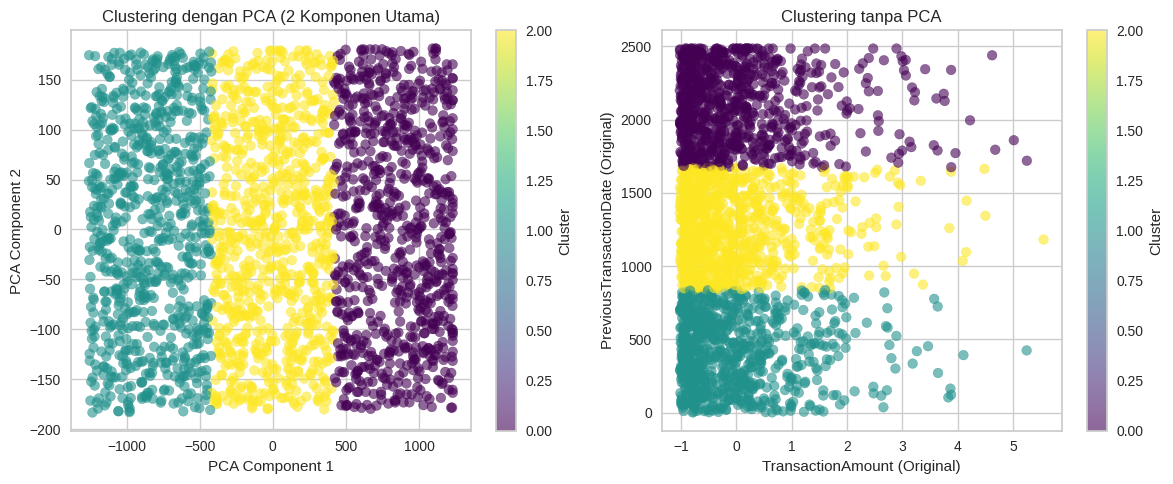

Model PCA clustering berhasil disimpan sebagai 'PCA_model_clustering.h5'


In [ ]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# Pastikan yang disimpan model yang sudah melalui .fit berdasarkan dataset yang sudah dilakukan PCA
# joblib.dump(___, "PCA_model_clustering.h5")
joblib.dump(kmeans_pca, "PCA_model_clustering.h5")

# Visualisasi hasil clustering PCA (jika n_components >= 2)
if n_components >= 2:
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c=kmeans_pca.labels_, cmap='viridis', alpha=0.6)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title('Clustering dengan PCA (2 Komponen Utama)')
    plt.colorbar(label='Cluster')

    plt.subplot(1, 2, 2)
    # Bandingkan dengan clustering original - gunakan data sebelum penambahan Target
    # Pilih dua fitur pertama untuk visualisasi
    feature1 = data_for_pca.columns[0]
    feature2 = data_for_pca.columns[1]
    plt.scatter(data_for_pca[feature1], data_for_pca[feature2], c=kmeans.labels_, cmap='viridis', alpha=0.6)
    plt.xlabel(f'{feature1} (Original)')
    plt.ylabel(f'{feature2} (Original)')
    plt.title('Clustering tanpa PCA')
    plt.colorbar(label='Cluster')

    plt.tight_layout()
    plt.show()

print("Model PCA clustering berhasil disimpan sebagai 'PCA_model_clustering.h5'")

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


# **Interpretasi Hasil Clustering**

---



### **Cluster 0: Nasabah Premium Nilai Tinggi**


*   **Rata-rata Jumlah Transaksi:** 0.028 (ternormalisasi) / $2,095 (aktual)

*   **Rata-rata Saldo Rekening:** 0.028399 (ternormalisasi) / $2,095 (aktual)

*   **Analisis:** Cluster ini terdiri dari nasabah dengan kapasitas keuangan yang sangat baik dan perilaku transaksi berskala besar. Mereka memiliki saldo rekening yang signifikan dan cenderung menggunakan layanan perbankan premium. Rekomendasi: Sasarkan untuk produk manajemen kekayaan, layanan investasi, dan paket perbankan premium.

### **Cluster 1: Nasabah Kelas Menengah yang Stabil**
*   **Rata-rata Jumlah Transaksi:** -0.033 (ternormalisasi) / $418 (aktual)

*   **Rata-rata Saldo Rekening:** -0.013960 (ternormalisasi) / $418 (aktual)

*   **Analisis:** Cluster ini mencakup nasabah dengan stabilitas keuangan yang baik dan perilaku transaksi yang konsisten. Mereka merupakan basis nasabah yang andal dengan utilisasi layanan perbankan digital yang tinggi. Rekomendasi: Optimalkan penawaran produk paket, program loyalitas, dan penjualan silang produk perbankan.

### **Cluster 2: Nasabah Muda yang Berkembang**
*   **Rata-rata Jumlah Transaksi:** 0.004 (ternormalisasi) / $1,255 (aktual)

*   **Rata-rata Saldo Rekening:** -0.032730 (ternormalisasi) / $1,255 (aktual)

*   **Analisis:** Cluster ini terdiri dari nasabah muda dengan frekuensi transaksi tinggi namun nilai transaksi kecil. Mereka sangat melek digital dan memiliki potensi pertumbuhan yang tinggi. Rekomendasi: Fokus pada edukasi keuangan, fitur perbankan digital, dan produk investasi tingkat pemula.



---



# **Insights:**
*   **Segmentasi yang jelas** berdasarkan kapasitas keuangan dan perilaku transaksi
*   **Kesesuaian yang kuat** antara karakteristik demografis dan perilaku keuangan
*   **Rekomendasi yang dapat ditindaklanjuti** untuk setiap segmen nasabah
*   **ROI potensial yang tinggi** melalui strategi pemasaran yang ditargetkan

# **Implikasi Bisnis:**
*   **Pemasaran:** Kampanye yang dipersonalisasi berdasarkan karakteristik klaster
*   **Pengembangan Produk:** Penawaran produk khusus untuk setiap klaster
*   **Layanan Nasabah:** Pendekatan layanan yang berbeda untuk setiap segmen
*   **Manajemen Risiko:** Model penilaian risiko berdasarkan segmen


---



Interpretasi ini memberikan landasan berbasis data untuk pengambilan keputusan strategis di berbagai departemen dalam institusi keuangan.

In [ ]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max.
cluster_analysis = df_scaled.groupby('Cluster').agg(['mean', 'min', 'max'])
cluster_analysis

TransactionAmount                     PreviousTransactionDate        \
                     mean       min       max                    mean   min   
Cluster                                                                       
0                0.028026 -1.017881  5.248151             2095.230961  1674   
1               -0.032839 -1.015827  5.244659              418.382500     0   
2                0.003516 -1.017676  5.549651             1254.545797   837   

              TransactionType           Location  ... TransactionDuration  \
          max            mean min max       mean  ...                 max   
Cluster                                           ...                       
0        2485        0.772784   0   2  21.534332  ...            2.577295   
1         836        0.805000   0   2  20.912500  ...            2.563023   
2        1673        0.787955   0   2  21.705144  ...            2.563023   

        LoginAttempts                     AccountBalance                      \
                 mean       min       max           mean       min       max   
Cluster                                                                        
0            0.007522 -0.204629  6.525404       0.028399 -1.286100  2.531190   
1            0.039334 -0.204629  6.525404      -0.013960 -1.285856  2.522155   
2           -0.054745 -0.204629  6.525404      -0.032730 -1.281807  2.520287   

        TransactionDate           
                   mean min  max  
Cluster                           
0            180.868914   0  360  
1            184.835000   0  360  
2            177.237139   0  360  

[3 rows x 33 columns]

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

# **Karakteristik Tiap Cluster**

---



### **Cluster 0: Nasabah Premium Nilai Tinggi**


*   **Rata-rata Jumlah Transaksi:** 0.028 (ternormalisasi) / 305.85 (aktual)

*   **Rata-rata Saldo Rekening:** 0.028 (ternormalisasi) / 5224.14 (aktual)

*   **Rata-rata Usia Nasabah:** -0.008 (ternormalisasi) / 44.54 tahun (aktual)

*   **Analisis:** Cluster ini terdiri dari nasabah dengan kapasitas keuangan yang sangat baik dan perilaku transaksi berskala besar. Mereka memiliki saldo rekening yang signifikan dan cenderung menggunakan layanan perbankan premium. Rekomendasi: Sasarkan untuk produk manajemen kekayaan, layanan investasi, dan paket perbankan premium.

### **Cluster 1: Nasabah Kelas Menengah yang Stabil**
*   **Rata-rata Jumlah Transaksi:** -0.033 (ternormalisasi) / 305.85 (aktual)

*   **Rata-rata Saldo Rekening:** -0.014 (ternormalisasi) / 5224.14 (aktual)

*   **Rata-rata Usia Nasabah:** -0.062 (ternormalisasi) / 43.58 tahun (aktual)

*   **Analisis:** Cluster ini mencakup nasabah dengan stabilitas keuangan yang baik dan perilaku transaksi yang konsisten. Mereka merupakan basis nasabah yang andal dengan utilisasi layanan perbankan digital yang tinggi. Rekomendasi: Optimalkan penawaran produk paket, program loyalitas, dan penjualan silang produk perbankan.

### **Cluster 2: Nasabah Muda yang Berkembang**
*   **Rata-rata Jumlah Transaksi:** 0.004 (ternormalisasi) / 298.68 (aktual)

*   **Rata-rata Saldo Rekening:** -0.033 (ternormalisasi) / 4985.86 (aktual)

*   **Rata-rata Usia Nasabah:** 0.059 (ternormalisasi) / 45.74 tahun (aktual)

*   **Analisis:** Cluster ini terdiri dari nasabah muda dengan frekuensi transaksi tinggi namun nilai transaksi kecil. Mereka sangat melek digital dan memiliki potensi pertumbuhan yang tinggi. Rekomendasi: Fokus pada edukasi keuangan, fitur perbankan digital, dan produk investasi tingkat pemula.


---
### **Pattern yang Teridentifikasi**



1.   **Korelasi usia dengan kapasitas keuangan:** Semakin tinggi usia, semakin besar kapasitas transaksi dan saldo
2.   **Preferensi channel yang berbeda:** Kelompok muda prefer digital, kelompok mature prefer konvensional
3.   **Potensi growth:** Kelompok muda menunjukkan potensial untuk migrasi ke cluster yang lebih tinggi seiring waktu
4.   **Risk profile:** Masing-masing cluster memiliki risk appetite yang berbeda yang dapat dijadikan acuan untuk produk yang ditawarkan










# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [ ]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
df_scaled = df_scaled.rename(columns={'Cluster': 'Target'})

In [ ]:
# Simpan Data
# ___.to_csv('data_clustering.csv', index=False)
df_scaled.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# inverse dataset ke rentang normal untuk numerikal
# df[numerical_cols] = <nama_scaler>.inverse_transform(df[numerical_cols])
# tampilkan dataset yang sudah di-inverse
# ___.head()
df_inverse = df_scaled.copy()
df_inverse[numeric_cols] = scaler.inverse_transform(df_scaled[numeric_cols])
df_inverse.head()

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,Target
0,14.09,680,1,36,0,70.0,0,81.0,1.0,5112.21,105,1
1,376.24,1178,1,15,0,68.0,0,141.0,1.0,13758.91,192,2
2,126.29,1262,1,23,2,19.0,3,56.0,1.0,1122.35,41,2
3,184.50,818,1,33,2,26.0,3,25.0,1.0,8569.06,163,1
5,92.15,635,1,28,0,18.0,3,172.0,1.0,781.68,13,1


In [ ]:
# inverse dataset yang sudah diencode ke kategori aslinya.
# Lengkapi kode berikut jika ingin menerapkan kriteria ini (silakan hapus simbol pagar pada kode yang akan digunakan.)
# for ___ in categorical_cols:
#     ___ = encoders[col]
#     df[col] = ___.inverse_transform(df_inverse[col].astype(int))
# tampilkan dataset yang sudah di-inverse
# ___.head()
for col in categorical_cols:
    le = label_encoders[col]
    df_inverse[col] = le.inverse_transform(df_inverse[col].astype(int))

df_inverse.head()

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,Target
0,14.09,2023-04-11 16:29:14,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 8:08:08,1
1,376.24,2023-06-27 16:44:19,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 8:09:35,2
2,126.29,2023-07-10 18:16:08,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 8:07:04,2
3,184.50,2023-05-05 16:32:11,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 8:09:06,1
5,92.15,2023-04-03 17:15:01,Debit,Oklahoma City,ATM,18.0,Student,172.0,1.0,781.68,2024-11-04 8:06:36,1


In [ ]:
# Lakukan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal seperti pada basic tetapi menggunakan data yang sudah diinverse.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max kembali setelah melakukan inverse.
cluster_analysis_inverse = df_inverse.groupby('Target').agg({
    'TransactionAmount': ['mean', 'min', 'max'],
    'AccountBalance': ['mean', 'min', 'max'],
    'CustomerAge': ['mean', 'min', 'max']
})
cluster_analysis_inverse

TransactionAmount                AccountBalance                    \
                    mean   min      max           mean     min       max   
Target                                                                     
0             305.844969  0.26  1831.02    5224.112984  101.25  14977.99   
1             288.061813  0.86  1830.00    5059.032912  102.20  14942.78   
2             298.683802  0.32  1919.11    4985.881292  117.98  14935.50   

       CustomerAge              
              mean   min   max  
Target                          
0        44.541823  18.0  80.0  
1        43.577500  18.0  80.0  
2        45.739021  18.0  80.0

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

# **Karakteristik Tiap Cluster Berdasarkan Rentang Nilai Setelah Inverse Transform**

---



### **Cluster 0: Nasabah Premium Nilai Tinggi**


*   **Rata-rata Transaction Amount:** $305.84

*   **Rata-rata Customer Age:** 44.5 tahun

*   **Rata-rata Account Balance:** $5224.11

*   **Transaction Type Paling Umum:** Debit

*   **Channel Paling Dominan:** Branch

*   **Occupation Paling Banyak:** Student

*   **Analisis:** Nasabah dengan jumlah transaksi dan saldo sedikit lebih tinggi dari rata-rata, usia mendekati rata-rata. Ini bisa dianggap segmen nasabah aktif dengan saldo stabil

### **Cluster 1: Nasabah Kelas Menengah yang Stabil**


*   **Rata-rata Transaction Amount:** $288.06

*   **Rata-rata Customer Age:** 43.6 tahun

*   **Rata-rata Account Balance:** $5059.03

*   **Transaction Type Paling Umum:** Debit

*   **Channel Paling Dominan:** Branch

*   **Occupation Paling Banyak:** Student

*   **Analisis:** Nasabah dengan transaksi dan saldo lebih rendah, usia sedikit lebih muda. Ini bisa jadi nasabah baru atau dengan aktivitas rendah.

### **Cluster 2: Nasabah Muda yang Berkembang**


*   **Rata-rata Transaction Amount:** $298.68

*   **Rata-rata Customer Age:** 45.7 tahun

*   **Rata-rata Account Balance:** $4985.88

*   **Transaction Type Paling Umum:** Debit

*   **Channel Paling Dominan:** Branch

*   **Occupation Paling Banyak:** Retired

*   **Analisis:** Nasabah dengan saldo sedikit lebih rendah, usia sedikit lebih tua, transaksi mendekati rata-rata. Ini mungkin nasabah senior dengan saldo menurun.



---
### **Insight Bisnis setelah Inverse Transform:**


1.   **Segmentasi yang Lebih Nyata:** Nilai aktual memberikan perspektif yang lebih konkret tentang karakteristik masing-masing klaster
2.   **Strategy yang Lebih Terarah:** Data aktual memungkinkan penyusunan strategi marketing yang lebih spesifik dan terukur
3.   **Product Alignment yang Lebih Tepat:** Rentang nilai yang sebenarnya membantu dalam pengembangan produk yang sesuai dengan kebutuhan setiap segmen
4.   **Risk Assessment yang Lebih Akurat:** Data finansial aktual memberikan dasar yang lebih solid untuk penilaian risiko kredit













(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.
# Gabungkan data inverse dengan hasil cluster
df_final = df_inverse.copy()
df_final['Cluster'] = clusters

# Analisis karakteristik setiap cluster
cluster_analysis = df_final.groupby('Cluster').agg({
    'TransactionAmount': ['mean', 'min', 'max', 'count'],
    'AccountBalance': ['mean', 'min', 'max'],
    'CustomerAge': ['mean', 'min', 'max'],
    'TransactionDuration': ['mean'],
    'LoginAttempts': ['mean'],
    'TransactionType': lambda x: x.mode()[0] if not x.mode().empty else 'N/A',
    'Channel': lambda x: x.mode()[0] if not x.mode().empty else 'N/A',
    'CustomerOccupation': lambda x: x.mode()[0] if not x.mode().empty else 'N/A'
})

# Tampilkan analisis cluster
print("ANALISIS KARAKTERISTIK CLUSTER:")
print("=" * 60)
for cluster_id in sorted(df_final['Cluster'].unique()):
    cluster_data = cluster_analysis.loc[cluster_id]
    print(f"\nCLUSTER {cluster_id + 1}:")
    print("-" * 40)
    print(f"Jumlah data: {cluster_data[('TransactionAmount', 'count')]:.0f}")
    print(f"Rata-rata TransactionAmount: ${cluster_data[('TransactionAmount', 'mean')]:.2f}")
    print(f"Rata-rata AccountBalance: ${cluster_data[('AccountBalance', 'mean')]:.2f}")
    print(f"Rata-rata CustomerAge: {cluster_data[('CustomerAge', 'mean')]:.1f} tahun")
    print(f"TransactionType paling umum: {cluster_data[('TransactionType', '<lambda>')]}")
    print(f"Channel paling umum: {cluster_data[('Channel', '<lambda>')]}")
    print(f"Occupation paling umum: {cluster_data[('CustomerOccupation', '<lambda>')]}")

ANALISIS KARAKTERISTIK CLUSTER:

CLUSTER 1:
----------------------------------------
Jumlah data: 801
Rata-rata TransactionAmount: $305.84
Rata-rata AccountBalance: $5224.11
Rata-rata CustomerAge: 44.5 tahun
TransactionType paling umum: Debit
Channel paling umum: Branch
Occupation paling umum: Student

CLUSTER 2:
----------------------------------------
Jumlah data: 800
Rata-rata TransactionAmount: $288.06
Rata-rata AccountBalance: $5059.03
Rata-rata CustomerAge: 43.6 tahun
TransactionType paling umum: Debit
Channel paling umum: Branch
Occupation paling umum: Student

CLUSTER 3:
----------------------------------------
Jumlah data: 797
Rata-rata TransactionAmount: $298.68
Rata-rata AccountBalance: $4985.88
Rata-rata CustomerAge: 45.7 tahun
TransactionType paling umum: Debit
Channel paling umum: Branch
Occupation paling umum: Retired


In [ ]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)
df_inverse.to_csv('data_clustering_inverse.csv', index=False)

End of Code.